In [4]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [5]:
dn = pd.read_csv("C:/Users/danie/OneDrive/Documents/T2/IA/Project/US_Accidents_March23.csv")

In [6]:
dn.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
dn.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
null_counts=dn.isnull().sum()
total_rows=len(dn)
null_count_percetnage=(null_counts/total_rows)*100
print(null_count_percetnage)

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [9]:
print(dn.describe())


           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

In [10]:
dn.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

##Scatter plots for finding correlation between Severity and features

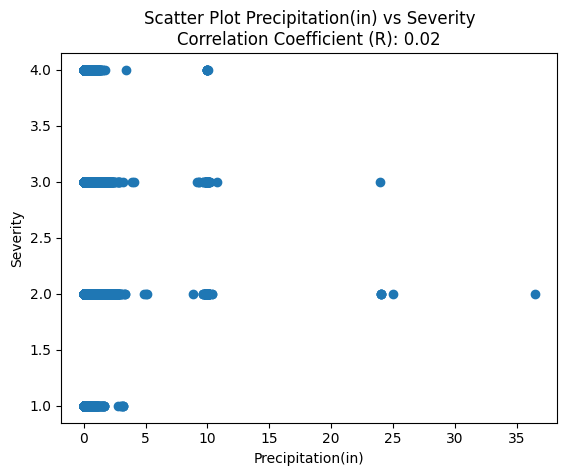

In [11]:

#Precipitation in this dataset refers to precipitation acumulation amount
#Scatter plot
correlation_coefficient_p = dn['Precipitation(in)'].corr(dn['Severity'])
plt.scatter(dn['Precipitation(in)'], dn['Severity'])
plt.xlabel('Precipitation(in)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Precipitation(in) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_p:.2f}')

plt.show()

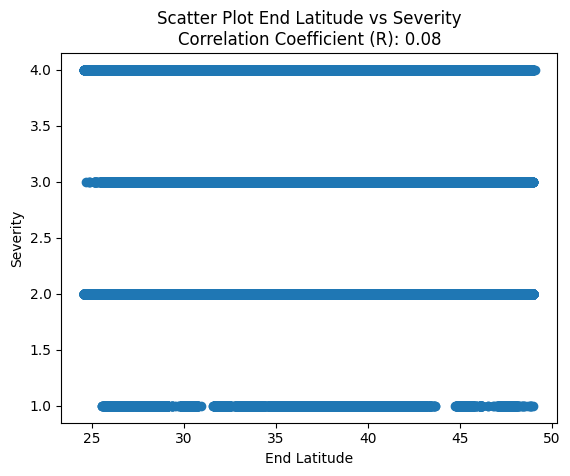

In [12]:
#End Latitude Scatter plot
correlation_coefficient_endLat = dn['End_Lat'].corr(dn['Severity'])
plt.scatter(dn['End_Lat'], dn['Severity'])
plt.xlabel('End Latitude')
plt.ylabel('Severity')
plt.title(f'Scatter Plot End Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

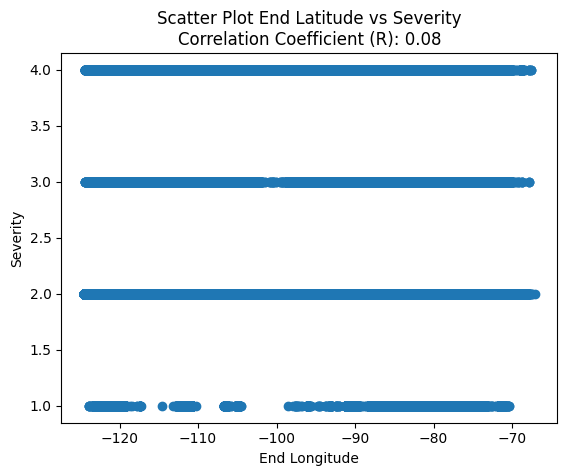

In [13]:
#End Longitude Scatter plot
correlation_coefficient_endLong = dn['End_Lng'].corr(dn['Severity'])
plt.scatter(dn['End_Lng'], dn['Severity'])
plt.xlabel('End Longitude')
plt.ylabel('Severity')
plt.title(f'Scatter Plot End Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

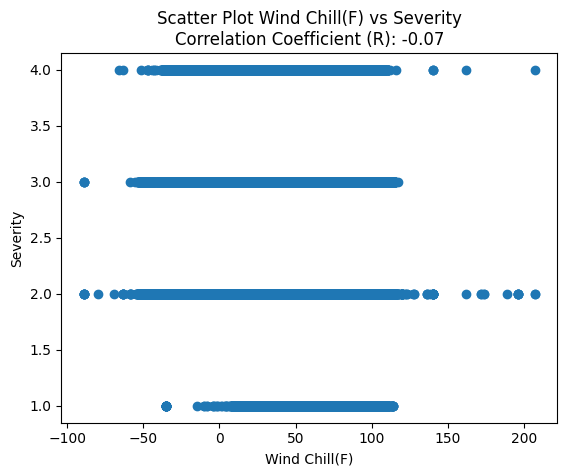

In [14]:
#Wind Chill Scatter plot
correlation_coefficient_WC = dn['Wind_Chill(F)'].corr(dn['Severity'])
plt.scatter(dn['Wind_Chill(F)'], dn['Severity'])
plt.xlabel('Wind Chill(F)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Wind Chill(F) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_WC:.2f}')

plt.show()

In [15]:
##1 'ID'-Not Apply for correlation



In [17]:
##2 'Source'-Not Apply for correlation


In [ ]:
##3 'Severity'-Not Apply

In [19]:
## 4 Start_Time -Not Apply for correlation

In [ ]:
##5 End_Time -Not Apply for correlation

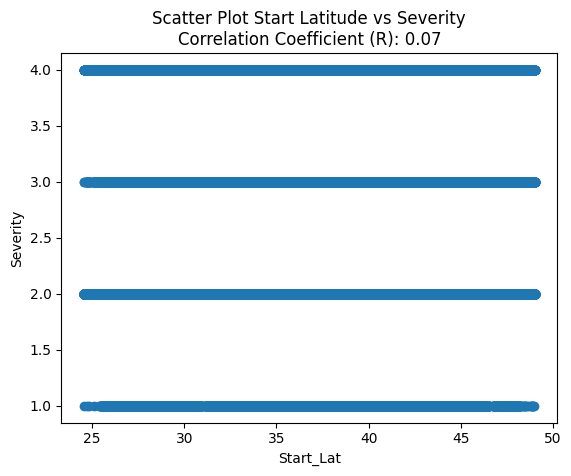

In [23]:
##Start_Lat Scatter plot
correlation_coefficient_startLat = dn['Start_Lat'].corr(dn['Severity'])
plt.scatter(dn['Start_Lat'], dn['Severity'])
plt.xlabel('Start_Lat')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Start Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_startLat:.2f}')

plt.show()

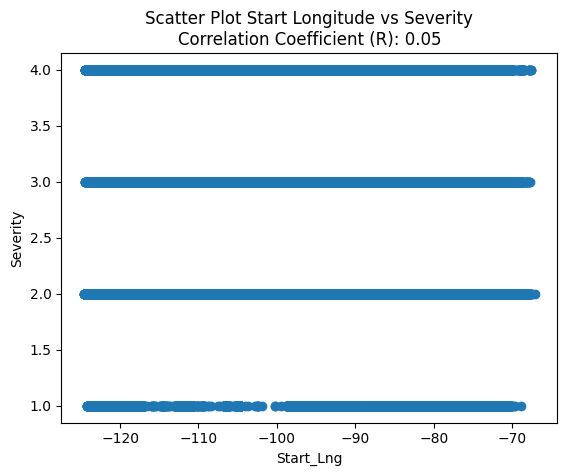

In [24]:
##Start_Lng Scatter plot
correlation_coefficient_startLong = dn['Start_Lng'].corr(dn['Severity'])
plt.scatter(dn['Start_Lng'], dn['Severity'])
plt.xlabel('Start_Lng')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Start Longitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_startLong:.2f}')

plt.show()

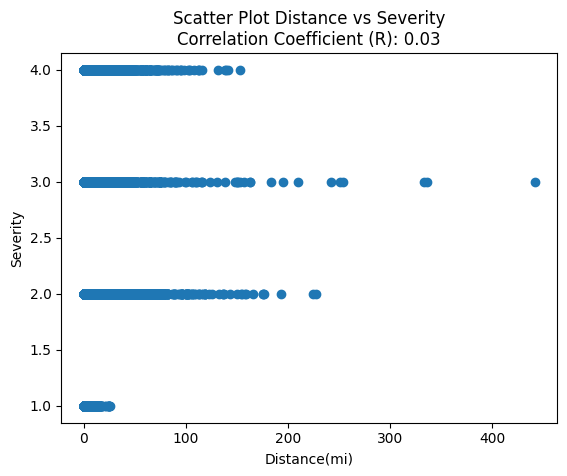

In [25]:
##Distance(mi) Scatter plot
correlation_coefficient_distance = dn['Distance(mi)'].corr(dn['Severity'])
plt.scatter(dn['Distance(mi)'], dn['Severity'])
plt.xlabel('Distance(mi)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Distance vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_distance:.2f}')

plt.show()

In [ ]:
##9 Description -Not Apply for correlation

In [ ]:
##10 'Street'- Not Apply for correlation

In [ ]:
##11 'City'-Not Apply for correlation

In [ ]:
##12 'County'-Not Apply for correlation

In [ ]:
##13 'State'-Not Apply for correlation

In [ ]:
##14 'Zipcode-Not Apply for correlation

In [ ]:
##1 Mar

In [ ]:
##2 Mar

In [ ]:
##3 Mar

In [ ]:
##4 Mar

In [ ]:
##5 Mar

In [ ]:
##6 Mar

In [ ]:
##7 Mar

In [ ]:
##8 Mar

In [ ]:
##9 Mar

In [ ]:
##10 Mar